In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df_police = pd.read_csv("Police_Arrests_20240702.csv")
df_police.head()
#df_police.shape

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00


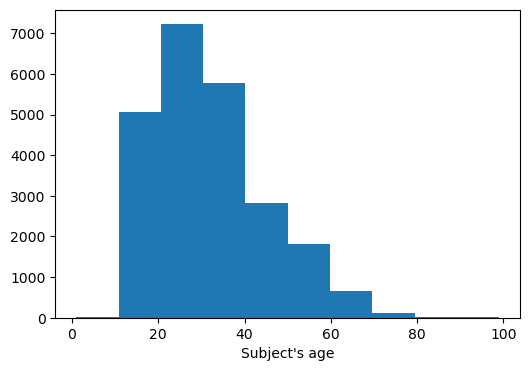

In [28]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Subject's age"])
ax.set_xlabel("Subject's age")
plt.show()

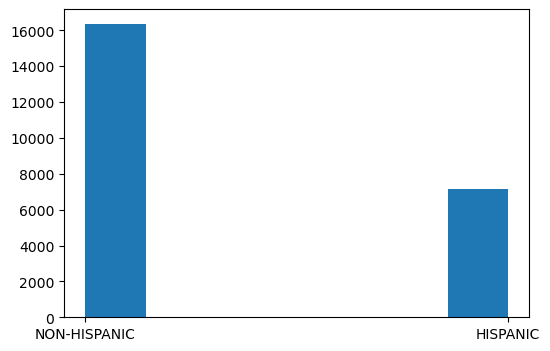

Ethnicity
NON-HISPANIC    0.695789
HISPANIC        0.304211
Name: proportion, dtype: float64

In [54]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Ethnicity"], bins = 7)
plt.show()
df_police["Ethnicity"].value_counts(normalize=True)

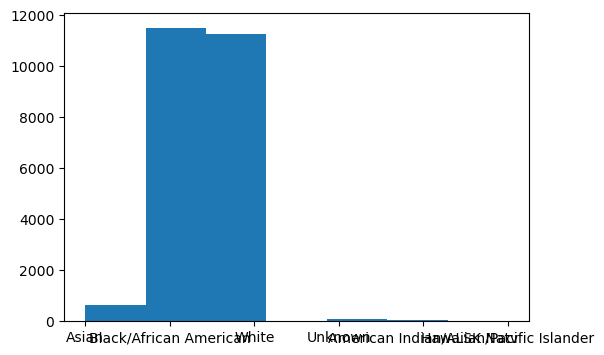

Subject's race
Black/African American       0.488941
White                        0.478775
Asian                        0.026882
Unknown                      0.003020
American Indian/ALSK Natv    0.001531
Hawaiian/Pacific Islander    0.000851
Name: proportion, dtype: float64

In [35]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Subject's race"], bins = 7)
plt.show()
df_police["Subject's race"].value_counts(normalize=True)

In [6]:
df_police["Subject's age"].quantile([.0, 0.001, 0.25, .5, 0.75, .9, .99, 0.999, 1])


0.000     1.0
0.001    11.0
0.250    22.0
0.500    30.0
0.750    39.0
0.900    51.0
0.990    67.0
0.999    79.0
1.000    99.0
Name: Subject's age, dtype: float64

In [37]:
df_police["Subject's age"].sort_values(ascending=False).head(10)

21334    99
15903    99
2966     99
13022    99
2023     99
20261    99
6579     99
23334    99
20450    86
18119    85
Name: Subject's age, dtype: int64

In [55]:
df_police['District of occurrence'].value_counts()

District of occurrence
3.0    4782
6.0    4748
4.0    4563
5.0    3820
1.0    2513
2.0    2196
8.0     786
Name: count, dtype: int64

In [72]:
df_police['ID_number'] = df_police['ID Reference Number ']
df_police.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,weekday,ID_number
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,2021,1,4,1
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,4,2
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,4,3
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,4,4
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,2021,1,4,5


In [74]:
df_police["Event Date/Time"] = pd.to_datetime(df_police['Event Date/Time'])
df_police["Year"] = df_police["Event Date/Time"].dt.year
df_police["Month"] = df_police["Event Date/Time"].dt.month
df_police["weekday"] = df_police["Event Date/Time"].dt.dayofweek


In [75]:
df_police["Event Date/Time"] = pd.to_datetime(df_police['Event Date/Time'])
df_police["Year"] = df_police["Event Date/Time"].dt.year
df_police["Year"].value_counts()


Year
2023    7353
2022    6735
2021    5885
2024    3537
Name: count, dtype: int64

In [76]:
df_police["Month"] = df_police["Event Date/Time"].dt.month
df_police["Month"].value_counts()

Month
3     2452
5     2352
4     2148
1     2134
2     2095
6     2039
12    1906
11    1808
8     1695
9     1656
10    1621
7     1604
Name: count, dtype: int64

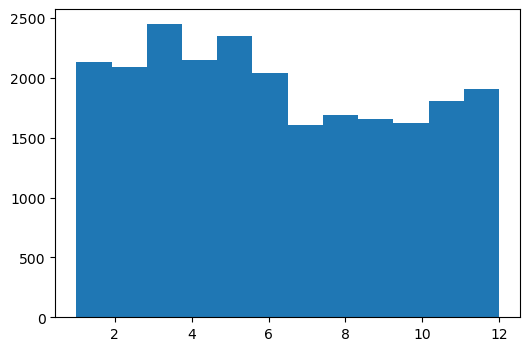

In [77]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Month"], bins = 12)
plt.show()

In [78]:
#df_police['Month'].groupby(df_police['Year']).value_counts()
df_police['Month'][df_police['Year'] == 2021]

0         1
1         1
2         1
3         1
4         1
         ..
15604     6
16733    12
17422    10
19682     6
22601    11
Name: Month, Length: 5885, dtype: int32

(array([538., 665., 631., 603., 653., 447.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

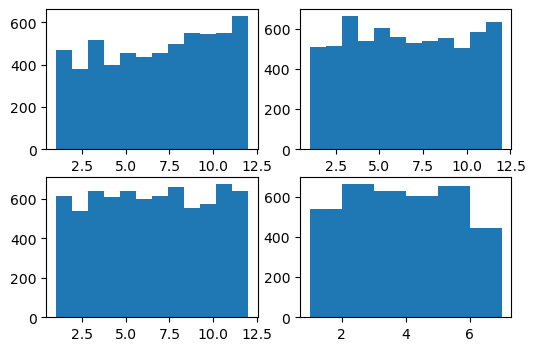

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

axes[0].hist(df_police['Month'][df_police['Year'] == 2021], bins = 12)
axes[1].hist(df_police['Month'][df_police['Year'] == 2022], bins = 12)
axes[2].hist(df_police['Month'][df_police['Year'] == 2023], bins = 12)
axes[3].hist(df_police['Month'][df_police['Year'] == 2024], bins = 6)


In [80]:
df_police[df_police["Subject's age"] > 86 ]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,weekday,ID_number
2023,2024,White,Female,99,NON-HISPANIC,1.0,0,RCPD,NaN,2021-05-21 21:32:00,2021,5,4,2024
2966,2967,White,Female,99,NON-HISPANIC,6.0,0,6D,PSB,2021-07-26 15:32:00,2021,7,0,2967
6579,6580,White,Male,99,HISPANIC,6.0,0,GPD,NaN,2022-02-17 00:40:00,2022,2,3,6580
13022,13023,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2023-01-26 16:24:00,2023,1,3,13023
15903,15904,White,Male,99,NON-HISPANIC,1.0,0,RCPD,NaN,2023-06-17 12:45:00,2023,6,5,15904
20261,20262,White,Female,99,HISPANIC,3.0,0,3D,PSB,2024-01-22 19:33:00,2024,1,0,20262
21334,21335,Asian,Female,99,NON-HISPANIC,4.0,1,CED,FSB,2024-03-11 10:15:00,2024,3,0,21335
23334,23335,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2024-02-24 00:00:00,2024,2,5,23335


In [81]:
df_police["weekday"] = df_police["Event Date/Time"].dt.dayofweek
df_police["weekday"]

0        4
1        4
2        4
3        4
4        4
        ..
23505    6
23506    0
23507    5
23508    5
23509    0
Name: weekday, Length: 23510, dtype: int32

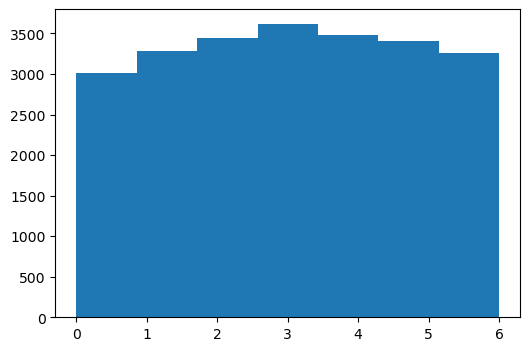

In [71]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["weekday"], bins = 7)
plt.show()

In [83]:
df_police['hour']= df_police["Event Date/Time"].dt.hour

df_police['hour'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         0
3         0
4         3
         ..
23505    11
23506     7
23507     2
23508     2
23509    16
Name: hour, Length: 23510, dtype: int32>

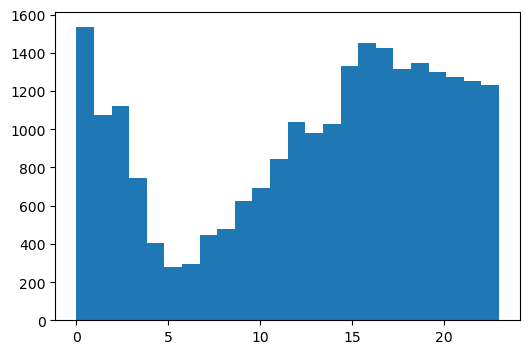

In [84]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["hour"], bins = 24)
plt.show()

KeyError: 'Age'

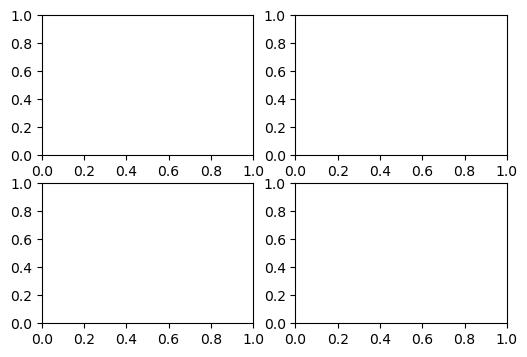

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

axes[0].hist(df_police['Age'][df_police['Year'] == 2021])
axes[1].hist(df_police['Age'][df_police['Year'] == 2022])
axes[2].hist(df_police['Age'][df_police['Year'] == 2023])
axes[3].hist(df_police['Age'][df_police['Year'] == 2024])